##Loading Required Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

###Load DataSet

In [ ]:
from google.colab import files
uploaded = files.upload()
file_path = next(iter(uploaded))
data = pd.read_csv(file_path)
print("First few rows of the dataset:")
print(data.head())
print("Basic information about the dataset:")
print(data.info())


Saving death .csv to death  (1).csv
First few rows of the dataset:
                        County   FIPS Met Objective of 45.5? (1)  \
0                United States      0                         No   
1       Perry County, Kentucky  21193                         No   
2      Powell County, Kentucky  21197                         No   
3  North Slope Borough, Alaska   2185                         No   
4      Owsley County, Kentucky  21189                         No   

  Age-Adjusted Death Rate Lower 95% Confidence Interval for Death Rate  \
0                      46                                         45.9   
1                   125.6                                        108.9   
2                   125.3                                        100.2   
3                   124.9                                           73   
4                   118.5                                         83.1   

  Upper 95% Confidence Interval for Death Rate Average Deaths per Year  \
0    

###Preprocessing(Checking for any null/invalid value)

In [ ]:
data.replace('*', np.nan, inplace=True)
data['Age-Adjusted Death Rate'] = pd.to_numeric(data['Age-Adjusted Death Rate'], errors='coerce')
data['Average Deaths per Year'] = data['Average Deaths per Year'].str.replace(',', '').astype(float)
data['Recent 5-Year Trend (2) in Death Rates'] = pd.to_numeric(data['Recent 5-Year Trend (2) in Death Rates'], errors='coerce')
cleaned_data = data.dropna(subset=['Age-Adjusted Death Rate', 'Average Deaths per Year', 'Recent 5-Year Trend (2) in Death Rates'])
print("Basic information about the cleaned dataset:")
print(cleaned_data.info())

Basic information about the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2694 entries, 0 to 2812
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   County                                        2694 non-null   object 
 1   FIPS                                          2694 non-null   int64  
 2   Met Objective of 45.5? (1)                    2694 non-null   object 
 3   Age-Adjusted Death Rate                       2694 non-null   float64
 4   Lower 95% Confidence Interval for Death Rate  2694 non-null   object 
 5   Upper 95% Confidence Interval for Death Rate  2694 non-null   object 
 6   Average Deaths per Year                       2694 non-null   float64
 7   Recent Trend (2)                              2694 non-null   object 
 8   Recent 5-Year Trend (2) in Death Rates        2694 non-null   float64
 9   Lower 95% Confidence In

##EDA

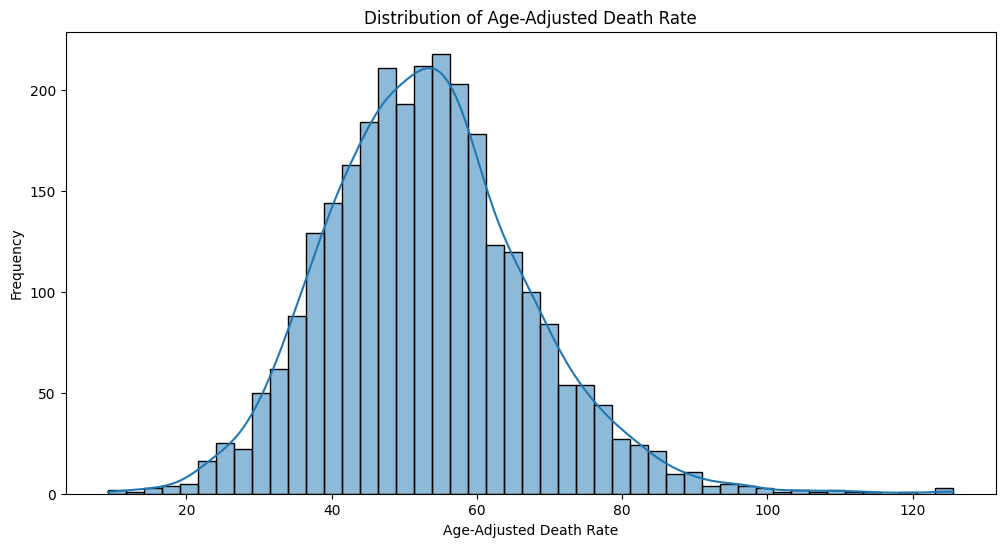

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Age-Adjusted Death Rate'].dropna(), kde=True)
plt.title('Distribution of Age-Adjusted Death Rate')
plt.xlabel('Age-Adjusted Death Rate')
plt.ylabel('Frequency')
plt.show()

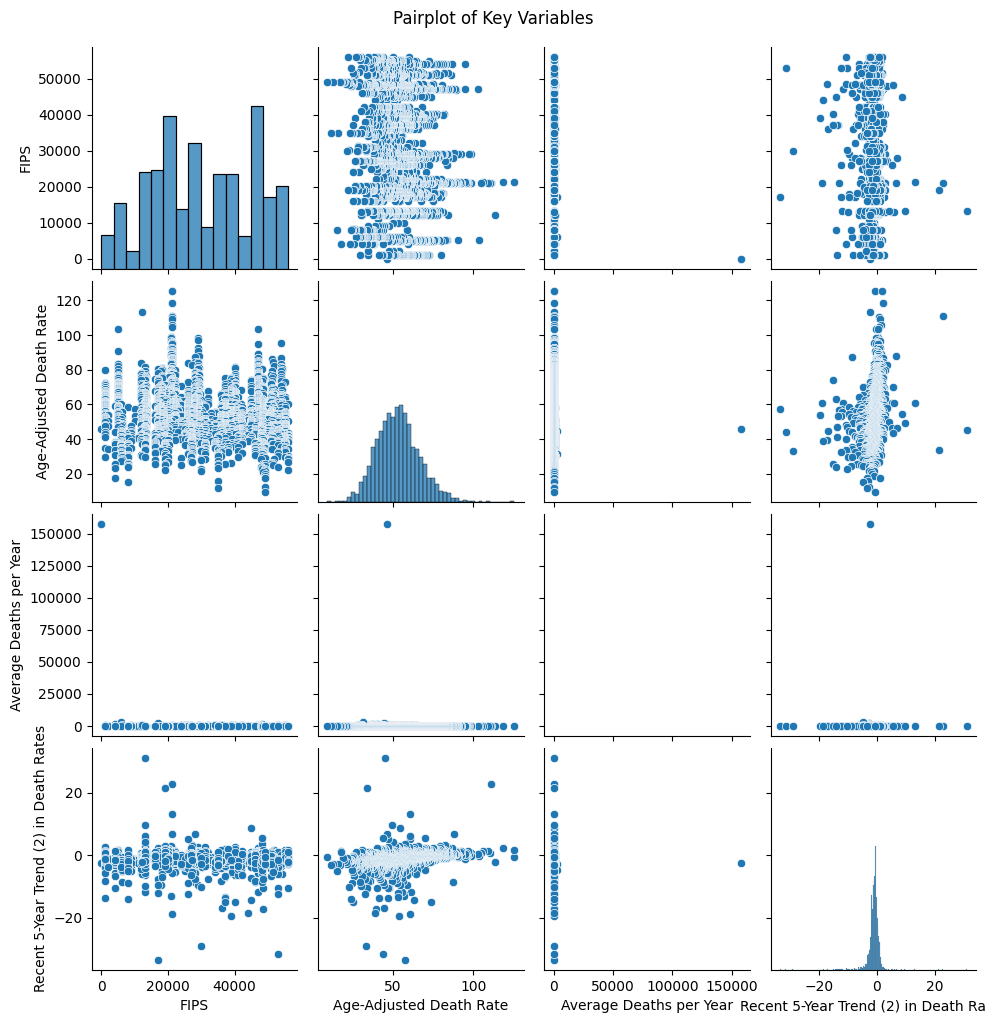

In [ ]:
sns.pairplot(data.dropna(subset=['Age-Adjusted Death Rate', 'Average Deaths per Year', 'Recent 5-Year Trend (2) in Death Rates']))
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

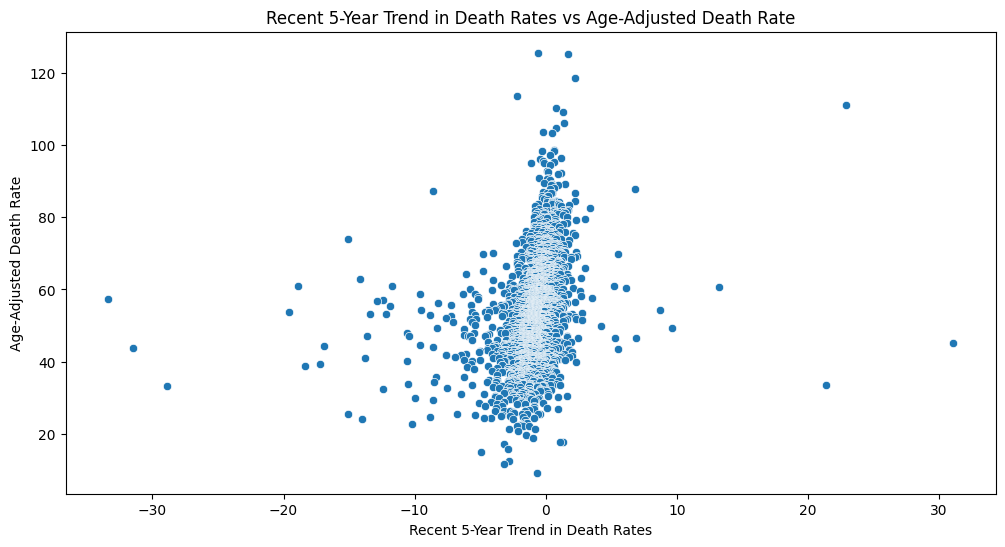

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recent 5-Year Trend (2) in Death Rates', y='Age-Adjusted Death Rate', data=data)
plt.title('Recent 5-Year Trend in Death Rates vs Age-Adjusted Death Rate')
plt.xlabel('Recent 5-Year Trend in Death Rates')
plt.ylabel('Age-Adjusted Death Rate')
plt.show()

##Splitting

In [ ]:
X = cleaned_data[['Average Deaths per Year', 'Recent 5-Year Trend (2) in Death Rates']]
Y = cleaned_data['Age-Adjusted Death Rate']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)


Shape of training data: (2155, 2)
Shape of testing data: (539, 2)


##Train

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
coefficients = regression_model.coef_
intercept = regression_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-4.86381988e-05  1.54947295e+00]
Intercept: 54.928937607504864


##Test

Mean Squared Error: 145.21612936343837
R-squared: 0.1114693667101021


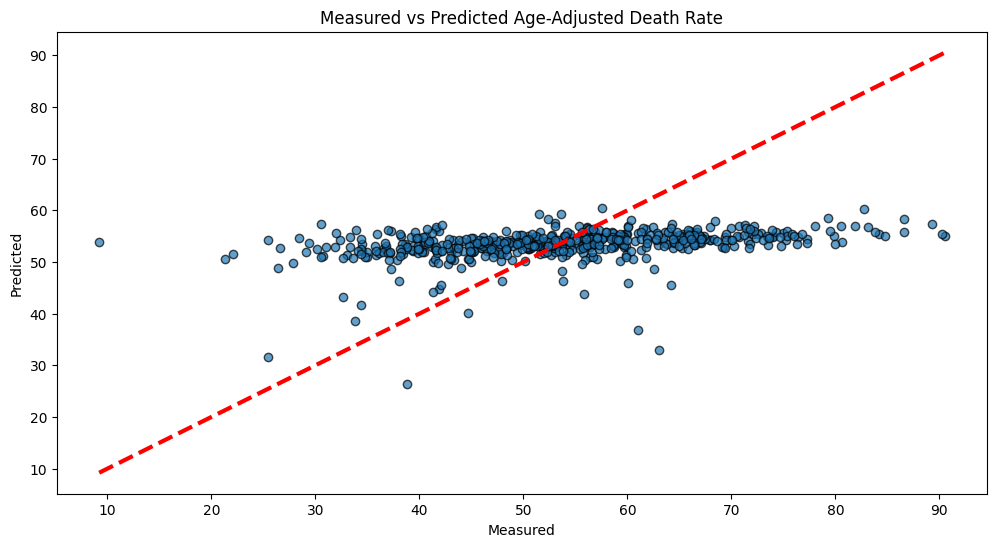

In [ ]:
Y_pred = regression_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Age-Adjusted Death Rate')
plt.show()

##Model Metrics

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MAE: {mae}')
print(f'R²: {r2}')

MAE: 9.571785115832862
R²: 0.1114693667101021
